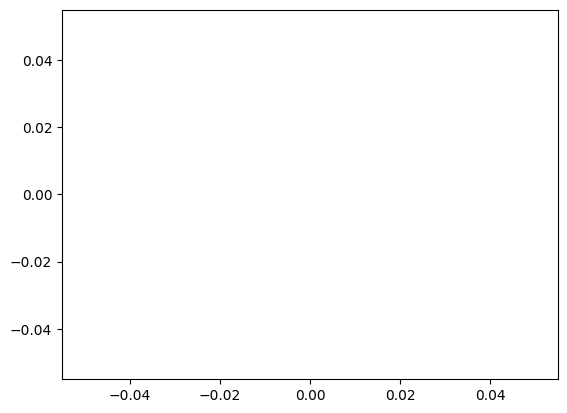

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import WageChangeSate, get_random_prob

In [2]:
prob = WageChangeSate()

<IPython.core.display.Latex object>

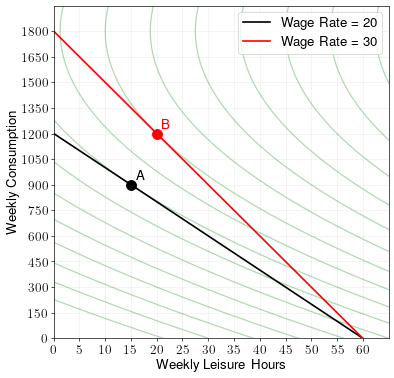

True

In [3]:
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, period1=True, period2=True)

In [4]:
examples = []
n_found = 0
for w1 in np.arange(15,80,5):
    for w2 in np.arange(15,80,5):
        for cmax in np.array([60])*max(w1,w2):
            for h1 in np.arange(10,55,5):
                a = cmax
                b = a*w1 - h1*w1**2
                params = {'a':a,'b':b,'w1':w1,'w2':w2,'cmax':cmax}
                prob = WageChangeSate(params)
                if prob.check_solution() and (w1!=w2):
                    n_found+=1
                    examples.append( prob.params | prob.sol )
                    if (n_found%1000==0):
                        print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("WageChangeSate_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

145 examples found.


<IPython.core.display.Latex object>

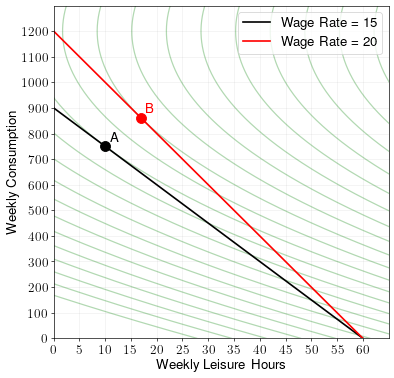

True

In [5]:
prob = get_random_prob(WageChangeSate, "WageChangeSate_examples.csv")
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, period1=True, period2=True)

<IPython.core.display.Latex object>

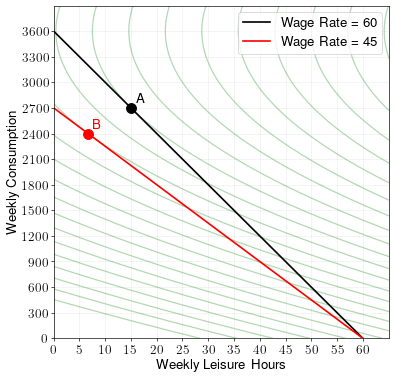

True

In [6]:
mydf = examples.loc[ 
    (examples['l2']-examples['l1'])/(examples['w2']-examples['w1']) > 0
].sample(1).reset_index(drop=True)

params = dict(mydf.loc[0])
prob = WageChangeSate(params)
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, period1=True, period2=True)
